### Step 1: Installing and Importing essential PIL's sub-modules

# pip install Pillow

In [2]:
from PIL import Image, ImageFilter, ImageEnhance
import matplotlib.pyplot as plt

### Step 2: Opening and Displaying Images

In [ ]:
image = Image.open("./images/lena256.jpg") 
print(type(image))


In [26]:
image.show()

### Explanation
- Image.open(image_path): Opens the image using PIL.
- plt.imshow(img): Displays the image with matplotlib.
- plt.axis('off'): Hides the axis for a cleaner look.

In [27]:
# Display the image
def show_image(pil_img):
    plt.imshow(pil_img)
    plt.axis('off')  # Optional: turns off axis
    plt.show()

In [ ]:
show_image(image)

### Step 3: Basic Image Information
Retrieve information like format, size, and color mode.


In [ ]:
print("Format:", image.format)    
print("Size:", image.size)        
print("Mode:", image.mode)        

In [30]:
import cv2

In [ ]:
img = cv2.imread("./images/lena256.jpg") 
print(type(img))
print(img.shape)

### Step 4: Resizing, Cropping, and Rotating
Pillow provides easy methods for resizing, cropping, and rotating.

In [ ]:
resized_image = image.resize((128, 128))
print("Format:", resized_image.format)    
print("Size:", resized_image.size)        
print("Mode:", resized_image.mode)  
resized_image.show()

#### Crop

In [38]:
cropped_image = image.crop((15, 35, 200, 235))  # (left, upper, right, lower) (col,row)
cropped_image.show()

In [ ]:
new_img = img[35:235,15:200,:]

In [ ]:
dir(image)

#### Rotate

In [39]:
rotated_image = image.rotate(45)  # Rotate 45 degrees
rotated_image.show()

### Step 5: Converting Between Color Modes
Convert an image between different color modes, like RGB, grayscale, and more.

In [ ]:
grayscale_image = image.convert("L")  # Convert to grayscale
grayscale_image.show()
print("Format:", grayscale_image.format)    
print("Size:", grayscale_image.size)        
print("Mode:", grayscale_image.mode)     

### Step 6: Splitting and Merging Color Channels
Separate and merge color channels like R, G, B in RGB.

In [ ]:
r, g, b = image.split()              
print("Format:", r.format)    
print("Size:", r.size)        
print("Mode:", r.mode)    


In [ ]:
merged_image = Image.merge("RGB", (r, g, b))  # Merge them back
merged_image.show()
print("Format:",merged_image.format)    
print("Size:", merged_image.size)        
print("Mode:", merged_image.mode)    

### Step 7: Saving Images
Save images in various formats.

In [44]:
grayscale_image.save("./outs/output.png", "PNG")

In [ ]:
dir(image)

### Step 8: Applying Filters
Pillow offers several built-in filters
- The median filter is effective in removing salt-and-pepper noise by replacing each pixel with the median of its neighboring pixels.
- A mean filter smooths an image by averaging surrounding pixels. You can use PIL's ImageFilter for basic filters.

In [51]:
image = Image.open("./images/lena_salt_512.png")
# Apply Median Filter
mask = ImageFilter.MedianFilter(size=3)
median_filtered = image.filter(mask)
image.show()
median_filtered.show()




In [52]:
image = Image.open("./images/lena_noise_512.png")
# Apply Mean (Average) Filter
mask = ImageFilter.BoxBlur(radius=2)
mean_filtered = image.filter(mask)

image.show(title="Original")
mean_filtered.show(title="Mean Filtered")

### Step 9: Creating Thumbnails
Generate thumbnails without modifying the original image’s aspect ratio.

In [ ]:
image = Image.open("./images/lena256.jpg")
thumbnail_image = image.copy()
thumbnail_image.thumbnail((128, 128))
thumbnail_image.show()


In [ ]:
show_image(thumbnail_image)

### Step 10: Image Histogram
To compute and display the histogram of an image, use Pillow’s histogram() method and Matplotlib to plot it.

In [ ]:
image = Image.open("./images/mandril.png")
print(type(image), image.format, image.size, image.mode)


In [ ]:
dir(image)

In [ ]:

#gray = image.convert("L")  # Convert to grayscale
hist = image.histogram()
print(type(hist))
plt.plot(hist)
plt.title("Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

### Step 11: How to access and manipulate pixel intensity in a PIL image.
In this case, we will load an image, loop through each pixel to apply a threshold, and create a binary image based on the threshold.

In [ ]:
image =  Image.open("./images/bank.jpg")
print(type(image), image.format, image.size, image.mode)

image = image.convert('L')  
print(type(image), image.format, image.size, image.mode)

In [23]:
binary_image = Image.new('L', image.size)
binary_image.show()



In [21]:
threshold = 128
# Accesds and threshold each pixel
for x in range(image.width):
    for y in range(image.height):
        pixel_value = image.getpixel((x, y))  # Get the pixel intensity at (x, y)
        
        # Apply threshold
        if pixel_value >= threshold:
            binary_image.putpixel((x, y), 255)  # Set to white if above threshold
        else:
            binary_image.putpixel((x, y), 0)  # Set to black if below threshold

# Save or show the binary image
binary_image.show()

### Step 12: Otsu's Thresholding
Otsu’s method automatically finds a threshold value for separating foreground and background. This requires OpenCV.

In [22]:
import numpy as np
import cv2

In [ ]:
np_image = np.array(image, dtype='uint8')
print(type(image), type(np_image))

In [ ]:

value, otsu_threshold = cv2.threshold(np_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(value)

# Convert the result back to a PIL image
result_pil_image = Image.fromarray(otsu_threshold)

# Display or save the result
result_pil_image.show()

### Step 13: Image Enhancement with Power-Gamma Transformation
Enhancing image contrast with a gamma transformation using NumPy for pixel manipulation.

In [29]:
def gamma_transformation(img, gamma=1.5):
    img_array = np.array(img, dtype='float16') 
    norm_array = img_array/ 255.0
    enhanced_img = np.power(norm_array, gamma)
    enhanced_img = (enhanced_img*255).astype(np.uint8)
    return Image.fromarray(enhanced_img)

In [ ]:
image =  Image.open("./images/dark2.png")
image = image.convert('L')  
print(type(image), image.format, image.size, image.mode)
gamma_image = gamma_transformation(image, 0.2)
gamma_image.show()

In [ ]:
image =  Image.open("./images/A3.png")
print(type(image), image.format, image.size, image.mode)
image = image.convert('L')  
print(type(image), image.format, image.size, image.mode)
gamma_image = gamma_transformation(image, 1.8)
gamma_image.show()

### Step 14: Log Transformation for Image Enhancement
Log transformation can enhance darker areas in an image. This also requires NumPy.

In [35]:
def log_transform(img):
    img_array = np.array(img, dtype = 'float16') / 255.0
    c = 255 / np.log(1 + np.max(img_array))
    log_image = c * np.log(1 + img_array)
    return Image.fromarray(log_image.astype(np.uint8))

In [ ]:
dir(image)

In [36]:

log_image = log_transform(image)
log_image.show()

### Step 15: Edge Detection with Prewitt Filter
Edge detection can be achieved using filters like Prewitt, often used to detect horizontal and vertical edges. This requires OpenCV.

In [47]:
def prewitt_edge(img):
    kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    kernelx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(img, -1, kernelx)
    img_prewitty = cv2.filter2D(img, -1, kernely)
    return cv2.add( img_prewittx,  img_prewitty)
    

In [52]:
image =  Image.open("./images/lena_noise_512.png").convert('L') 
mask = ImageFilter.GaussianBlur(radius = 2)
image_filtered = image.filter(mask)
img = np.array(image_filtered)
edge_image = prewitt_edge(img)
edge_image = Image.fromarray(edge_image.astype(np.uint8))
edge_image.show()

### Step 16: Edge Detection with Sobel Filter
The Sobel filter enhances edge detection by applying a Gaussian smoothing to reduce noise before detecting edges.

In [53]:
def sobel_edge(img):
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Vertical
    return cv2.magnitude(sobel_x, sobel_y)

In [54]:
edge_image = sobel_edge(img)
edge_image = Image.fromarray(edge_image.astype(np.uint8))
edge_image.show()

### Step 17: Combining Filters for Advanced Enhancement
Combine various filters to enhance edges in a single image.

In [55]:
image =  Image.open("./images/lena_salt_512.png")
print(type(image), image.format, image.size, image.mode)
image = image.convert('L') 
print(type(image), image.format, image.size, image.mode)
image_median = image.filter(ImageFilter.MedianFilter(size=3))
gray_np = np.array(image_median )
sobel_x = cv2.Sobel(gray_np, cv2.CV_64F, 1, 0, ksize=3)  
sobel_y = cv2.Sobel(gray_np, cv2.CV_64F, 0, 1, ksize=3)  
sobel_image = cv2.magnitude(sobel_x, sobel_y)
edge_image = Image.fromarray(sobel_image.astype(np.uint8))
edge_image.show()

<class 'PIL.PngImagePlugin.PngImageFile'> PNG (512, 512) L
<class 'PIL.Image.Image'> None (512, 512) L


### Step 18: Understanding Color Channels in RGB
Each pixel in an RGB image has three channels: Red, Green, and Blue. You can split these channels and manipulate them separately.

In [56]:
def image_info(pil_img):
    info_img = "Format: {}, Size: {},  Mode: {} "
    print(info_img.format(pil_img.format, pil_img.size, pil_img.mode))

In [59]:
img = cv2.imread("./images/test_color.png") 
print(type(img), img.shape)
r,g,b = cv2.split(img)
print(type(r), r.shape)

<class 'numpy.ndarray'> (139, 162, 3)
<class 'numpy.ndarray'> (139, 162)


Format: PNG, Size: (162, 139),  Mode: RGB 
Format: None, Size: (162, 139),  Mode: L 


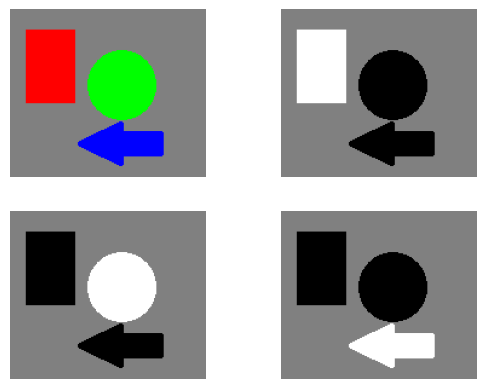

In [63]:
image = Image.open("./images/test_color.png")
image_info(image)
r, g, b = image.split()
image_info(r)
fig = plt.figure()
fig.add_subplot(221)
plt.imshow(image)
plt.axis('off')

fig.add_subplot(222)
plt.imshow(r, cmap='gray')
plt.axis('off')

fig.add_subplot(223)
plt.imshow(g, cmap='gray')
plt.axis('off')

fig.add_subplot(224)
plt.imshow(b, cmap='gray')
plt.axis('off')

plt.show()





### Step 19: Manipulating RGB Channels Individually
You can modify each color channel separately, then merge them back.

In [ ]:
image = Image.open("./images/mandril_color.png")
image_info(image)
r, g, b, a = image.split()

fig = plt.figure()
fig.add_subplot(121)
plt.imshow(image)
plt.axis('off')

fig.add_subplot(122)
plt.imshow(r, cmap='gray')
plt.axis('off')






In [ ]:
enhancer = ImageEnhance.Brightness(r)
r_enhanced = enhancer.enhance(1.5)

# Merge back to RGB
enhanced_image = Image.merge("RGB", (r_enhanced, g, b))

fig = plt.figure()
fig.add_subplot(121)
plt.imshow(enhanced_image)
plt.axis('off')

fig.add_subplot(122)
plt.imshow(r_enhanced, cmap='gray')
plt.axis('off')

plt.show()


### Step 20: Converting RGB to CMYK
CMYK is widely used for printing and consists of Cyan, Magenta, Yellow, and Black channels. You can convert RGB images to CMYK in PIL.

In [ ]:
image = Image.open("./images/cmyk.png")
image_info(image)
cmyk_image = image.convert("CMYK")
image_info(cmyk_image)
cmyk_image.show()


In [ ]:
c, m, y, k = cmyk_image.split()

fig = plt.figure()
fig.add_subplot(221)
plt.imshow(c, cmap='gray')
plt.axis('off')

fig.add_subplot(222)
plt.imshow(m, cmap='gray')
plt.axis('off')

fig.add_subplot(223)
plt.imshow(y, cmap='gray')
plt.axis('off')

fig.add_subplot(224)
plt.imshow(k, cmap='gray')
plt.axis('off')

plt.show()


### Step 21: Understanding and Manipulating CMYK Channels
Just like RGB, you can split and manipulate CMYK channels individually.

In [ ]:
image = Image.open("./images/cmyk2.png")
cmyk_image = image.convert("CMYK")
c, m, y, k = cmyk_image.split()

c_enh = ImageEnhance.Brightness(c).enhance(2.0)

# Merge CMYK back together
enhanced_cmyk_image = Image.merge("CMYK", (c_enh, m, y, k))

enhanced_image = enhanced_cmyk_image.convert("RGB") 

#enhanced_cmyk_image.show()

fig = plt.figure()
fig.add_subplot(221)
plt.imshow(image)
plt.axis('off')

fig.add_subplot(222)
plt.imshow(c, cmap='gray')
plt.axis('off')

fig.add_subplot(223)
plt.imshow(enhanced_image)
plt.axis('off')

fig.add_subplot(224)
plt.imshow(c_enh, cmap='gray')
plt.axis('off')

plt.show()




### Step 22: Understanding HSV Channels
HSV separates the image into Hue (color), Saturation (color intensity), and Value (brightness).

In [127]:
image = Image.open("./images/hsv01.png")
hsv_image = image.convert("HSV")
hsv_image.show()


In [ ]:
h, s, v = hsv_image.split()

fig = plt.figure()
fig.add_subplot(311)
plt.imshow(image)
plt.axis('off')

fig.add_subplot(312)
plt.imshow(h, cmap='gray')
plt.axis('off')

fig.add_subplot(313)
plt.imshow(s, cmap='gray')
plt.axis('off')

plt.show()


### Step 23: Filtering by Hue in HSV
This allows you to isolate certain colors. For example, isolating shades of blue by manipulating the Hue channel.

In [130]:
h_array = np.array(h)
blue_mask = np.where((h_array > 128) & (h_array < 255), 255, 0)  # Isolate blues
blue_image = Image.fromarray(blue_mask.astype("uint8"))
blue_image.show()